In [ ]:
pip install -U spacy

In [2]:
import spacy

In [ ]:
!python -m spacy download en_core_web_md

In [4]:
nlp = spacy.load("en_core_web_md")

In [5]:
doc = nlp("I ate banana")
doc[2].vector

array([ 2.0228e-01, -7.6618e-02,  3.7032e-01,  3.2845e-02, -4.1957e-01,
        7.2069e-02, -3.7476e-01,  5.7460e-02, -1.2401e-02,  5.2949e-01,
       -5.2380e-01, -1.9771e-01, -3.4147e-01,  5.3317e-01, -2.5331e-02,
        1.7380e-01,  1.6772e-01,  8.3984e-01,  5.5107e-02,  1.0547e-01,
        3.7872e-01,  2.4275e-01,  1.4745e-02,  5.5951e-01,  1.2521e-01,
       -6.7596e-01,  3.5842e-01, -4.0028e-02,  9.5949e-02, -5.0690e-01,
       -8.5318e-02,  1.7980e-01,  3.3867e-01,  1.3230e-01,  3.1021e-01,
        2.1878e-01,  1.6853e-01,  1.9874e-01, -5.7385e-01, -1.0649e-01,
        2.6669e-01,  1.2838e-01, -1.2803e-01, -1.3284e-01,  1.2657e-01,
        8.6723e-01,  9.6721e-02,  4.8306e-01,  2.1271e-01, -5.4990e-02,
       -8.2425e-02,  2.2408e-01,  2.3975e-01, -6.2260e-02,  6.2194e-01,
       -5.9900e-01,  4.3201e-01,  2.8143e-01,  3.3842e-02, -4.8815e-01,
       -2.1359e-01,  2.7401e-01,  2.4095e-01,  4.5950e-01, -1.8605e-01,
       -1.0497e+00, -9.7305e-02, -1.8908e-01, -7.0929e-01,  4.01

In [6]:
len(doc[2].vector)

300

In [7]:
doc = nlp("My name is JambalakadMamaba")

In [8]:
doc[3].vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [9]:
doc[3].has_vector, doc[3].is_oov # out of vocabulary 

(False, True)

### The similarity method

The Doc and Span objects also have vectors. The vector of a sentence or a span is the average of its words' vectors

In [10]:
doc1 = nlp("I visited England.")
doc2 = nlp("I went to London.")

In [11]:
doc1[1:3].similarity(doc2[1:4])

0.6539691

In [12]:
doc1[2].similarity(doc2[3])

0.73891276

In [13]:
doc1.similarity(doc2)

0.8771558796234277

In [14]:
doc1.similarity(doc1)

1.0

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [16]:
vocab = nlp("cat dog tiger elephant bird monkey lion cheetah burger pizza food cheese wine salad noodles macaroni fruit vegetable")

In [17]:
words = [word.text for word in vocab]

In [18]:
vectors = np.vstack([word.vector for word in vocab if word.has_vector])

In [19]:
pca = PCA(n_components=2)
vectors_transformed = pca.fit_transform(vectors)

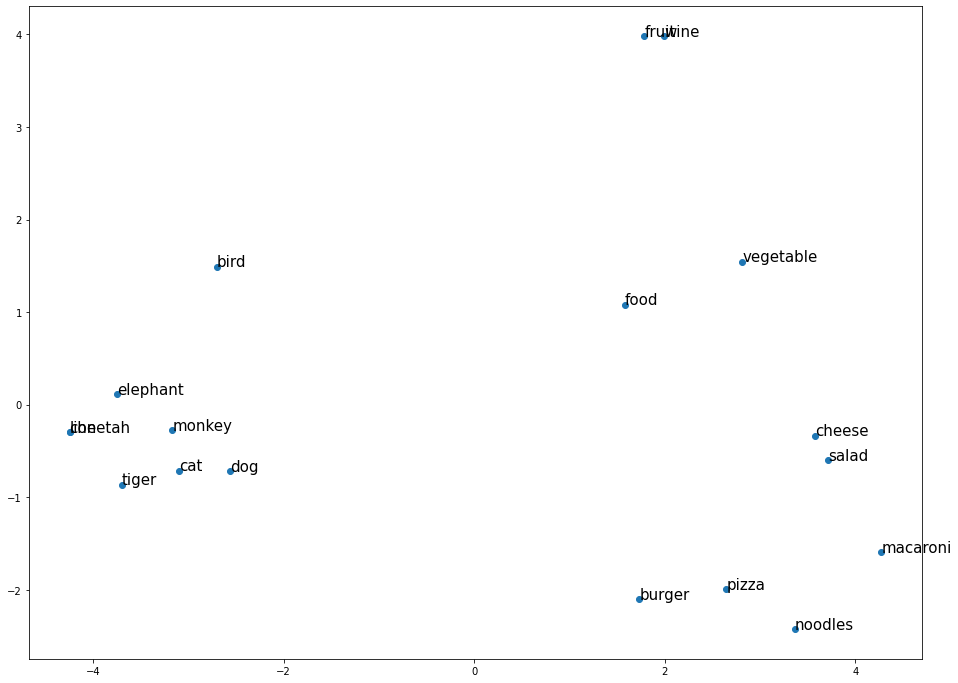

In [20]:
plt.figure(figsize=(16,12))
plt.scatter(vectors_transformed[:,0], vectors_transformed[:,1])
for word, coord in zip(words, vectors_transformed):
    x,y = coord
    plt.text(x,y,word, size=15)
plt.show()

### Using third-party word vectors

In [21]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.vec.zip

--2021-10-29 13:02:25--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 587879973 (561M) [application/zip]
Saving to: ‘wiki-news-300d-1M-subword.vec.zip’

wiki-news-300d-1M-s 100%[===================>] 560.65M  21.6MB/s    in 27s     

2021-10-29 13:02:52 (21.0 MB/s) - ‘wiki-news-300d-1M-subword.vec.zip’ saved [587879973/587879973]



In [22]:
!unzip wiki-news-300d-1M-subword.vec.zip

Archive:  wiki-news-300d-1M-subword.vec.zip
  inflating: wiki-news-300d-1M-subword.vec  


In [23]:
!python -m spacy init vectors en wiki-news-300d-1M-subword.vec en_subwords_wiki_lg

ℹ Creating blank nlp object for language 'en'
[2021-10-29 13:03:29,263] [INFO] Reading vectors from wiki-news-300d-1M-subword.vec
tcmalloc: large alloc 1199996928 bytes == 0x55a0f3fda000 @  0x7f118618c001 0x7f1183c8a54f 0x7f1183cdab58 0x7f1183cdeb17 0x7f1183d7d203 0x55a0ea762544 0x55a0ea762240 0x55a0ea7d6627 0x55a0ea763afa 0x55a0ea7d1915 0x55a0ea7d0ced 0x55a0ea763bda 0x55a0ea7d2737 0x55a0ea7d09ee 0x55a0ea6a2e2b 0x55a0ea7d2fe4 0x55a0ea7d0ced 0x55a0ea6a2e2b 0x55a0ea7d2fe4 0x55a0ea7d09ee 0x55a0ea76448c 0x55a0ea764698 0x55a0ea7d2fe4 0x55a0ea763afa 0x55a0ea7d1c0d 0x55a0ea7d0ced 0x55a0ea763bda 0x55a0ea7d1c0d 0x55a0ea7d0ced 0x55a0ea763bda 0x55a0ea7d1c0d
999994it [01:09, 14382.93it/s]
[2021-10-29 13:04:39,570] [INFO] Loaded vectors from wiki-news-300d-1M-subword.vec
✔ Successfully converted 999994 vectors
✔ Saved nlp object with vectors to output directory. You can now use
the path to it in your config as the 'vectors' setting in [initialize].
/content/en_subwords_wiki_lg


In [24]:
nlp = spacy.load("en_subwords_wiki_lg")

In [25]:
doc = nlp("I want Mango.")

In [26]:
doc[1].vector

array([ 0.0103,  0.0155,  0.0095, -0.0107, -0.0165,  0.0018,  0.001 ,
       -0.0567, -0.0156, -0.0216, -0.0526,  0.0553,  0.0077,  0.0076,
       -0.0052, -0.0184,  0.0325, -0.0026,  0.0723, -0.0249,  0.0117,
       -0.0067, -0.0106,  0.0526, -0.0109, -0.0104,  0.0409,  0.0158,
       -0.0324, -0.004 , -0.0235,  0.0152, -0.0016,  0.0102,  0.014 ,
       -0.0295,  0.0165, -0.0039,  0.0049,  0.0237, -0.0091,  0.0027,
       -0.0215, -0.003 , -0.0033, -0.065 , -0.0152, -0.017 ,  0.0103,
        0.008 ,  0.033 ,  0.0014, -0.027 , -0.0257, -0.0937,  0.0057,
       -0.0165, -0.0245, -0.0531,  0.0045,  0.0065,  0.0229,  0.0697,
        0.0155,  0.0166,  0.0174, -0.0128, -0.0243,  0.0145, -0.0175,
        0.0148, -0.0099,  0.0572, -0.0356,  0.0488, -0.0186,  0.0277,
       -0.0456, -0.0178,  0.0049, -0.0451,  0.0303,  0.0059,  0.0745,
       -0.0194, -0.0203, -0.0083, -0.0057, -0.0112,  0.0176,  0.0013,
        0.0021, -0.0693, -0.0549,  0.0269, -0.055 ,  0.0174,  0.0286,
       -0.0016,  0.0

In [27]:
nlp.pipe_names

[]

This model is blank. it does not contain any other pipeline components

### Semantic Similarity

spaCy uses cosine similarity to calculate semantic similarity. Hence, calling the similarity method helps us make cosine similarity calculations.

In [28]:
nlp = spacy.load("en_core_web_md")

In [29]:
sentences = nlp("I purchased a science fiction book last week. I loved everything related to this fragrance: light, floral and feminine... I purchased a bottle of wine.")

In [30]:
key = nlp("perfume")

In [32]:
for sent in sentences.sents:
    print(sent.similarity(key))


0.2481654331382154
0.5075297559861377
0.4215429463030136


Extracting important words

In [37]:
for sent in sentences.sents:
  nchunks = [nchunk.text for nchunk in sent.noun_chunks]
  nchunk_doc = nlp(" ".join(nchunks))
  print(nchunk_doc.similarity(key))

0.21390893517254456
0.6370830556977022
0.44506391511570403


Extracting and comparing named entities

In [38]:
doc1 = nlp("Google Search, often referred as Google, is the most popular search engine nowadays. It answers a huge volume of queries every day.")
doc2 = nlp("Microsoft Bing is another popular search engine. Microsoft is known by its star product Microsoft Windows, a popular operating system sold over the world.")
doc3 = nlp("The Dead Sea is the lowest lake in the world, located in the Jordan Valley of Israel. It is also the saltiest lake in the world.")

In [40]:
print(doc1.ents)
print(doc2.ents)
print(doc3.ents)

(Google Search, Google, every day)
(Microsoft Bing, Microsoft, Microsoft, Windows)
(The Dead Sea, the Jordan Valley, Israel)


In [41]:
ents1 = [ent.text for ent in doc1.ents]
ents2 = [ent.text for ent in doc2.ents]
ents3 = [ent.text for ent in doc3.ents]
ents1 = nlp(" ".join(ents1))
ents2 = nlp(" ".join(ents2))
ents3 = nlp(" ".join(ents3))

In [43]:
print(ents1.similarity(ents2))
print(ents1.similarity(ents3))
print(ents2.similarity(ents3))

0.5394545697831438
0.5596506323000792
0.36244710903224026
